In [1]:
import pandas as pd
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
#nltk.download('wordnet')
#01/3/24-
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("Twitter_Data.csv")
print(df)

                                                    tweet  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]


In [3]:
df.head()

df.dtypes

import numpy as np
np.sum(df.isnull().any(axis=1))

# Drop rows with null values
df.dropna(inplace=True)

np.sum(df.isnull().any(axis=1))

df.reset_index(drop=True, inplace=True)

print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

df['category'].unique()

df['category'].nunique()

Count of columns in the data is:   2
Count of rows in the data is:   162969


3

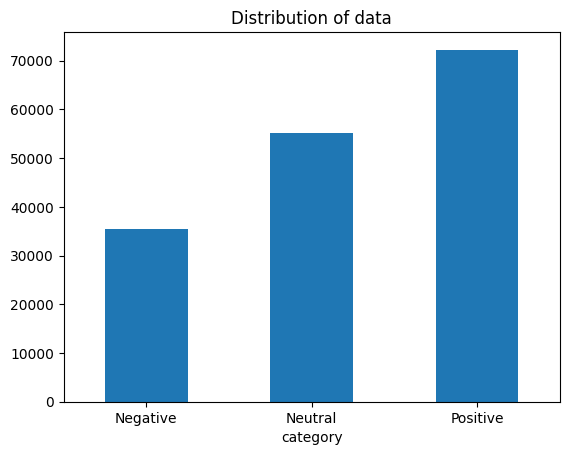

In [4]:
#DATA VISUALIZATION OF TARGET VARIABLES:
# Plotting the distribution for dataset.
ax = df.groupby('category').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['tweet']), list(df['category'])

C:\Users\hp\AppData\Local\Temp\ipykernel_4172\813607935.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette=colors_palette)


<Axes: xlabel='category', ylabel='count'>

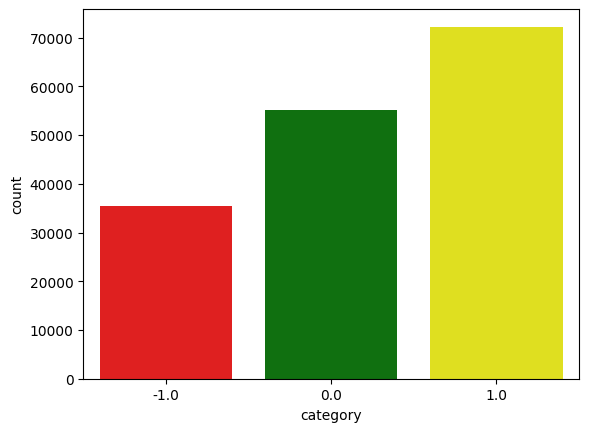

In [5]:
import seaborn as sns

# Define a color palette for the countplot
colors_palette = { '-1.0': 'red', '0.0': 'green', '1.0': 'yellow'}

# Plot the countplot with the specified color palette
sns.countplot(x='category', data=df, palette=colors_palette)

In [6]:
#Data Preprocessing 

#Selecting the text and Target column for our further analysis
data=df[['tweet','category']]

#Printing unique values of target variables
data['category'].unique()

#  column to be cleaned
column_to_clean = 'tweet'

# Function to clean the text
def clean_text(text):

    if pd.isna(text):#for twitter_data file only..removing NaN values 
       return ''
 
    text = re.sub(r'[^A-Za-z\s]', '', text)#removing any numbers or any other characters except  alphabets 
    text = re.sub(r'[^\x00-\x7F]+', '', text)#removing emojis..non ASCII characters etc 
    text = text.lower()#converting lowercase
    text = re.sub(r'@[\w]+', '', text)#removing twitter handles..ex @username
    text = re.sub(r'#', '', text)#removing twitter hastags
    text = re.sub(r'(.)\1+', r'\1', text)#removing Repetitive Characters

     # Tokenize the text
    tokens = text.split()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
     # Lemmatize the remaining words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply the cleaning function to the specified column and creates a new col
df['cleaned text'] = df[column_to_clean].apply(clean_text)

df.head()

X=data.tweet
y=data.category

# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)

#verifying data has been split correctly
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (130375,)
X_test shape: (32594,)
y_train shape: (130375,)
y_test shape: (32594,)


In [7]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

No. of feature_words:  500000


In [8]:
from sklearn.metrics import accuracy_score, classification_report

#Model Evaluation
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

In [10]:
from sklearn.calibration import LinearSVC

#Model Training
SVCmodel = LinearSVC(dual=False)
SVCmodel.fit(X_train, y_train)

model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy Score:", accuracy)


              precision    recall  f1-score   support

        -1.0       0.92      0.87      0.89      7059
         0.0       0.94      0.97      0.96     11062
         1.0       0.94      0.95      0.94     14473

    accuracy                           0.94     32594
   macro avg       0.93      0.93      0.93     32594
weighted avg       0.94      0.94      0.94     32594

Accuracy Score: 0.9368288642081365


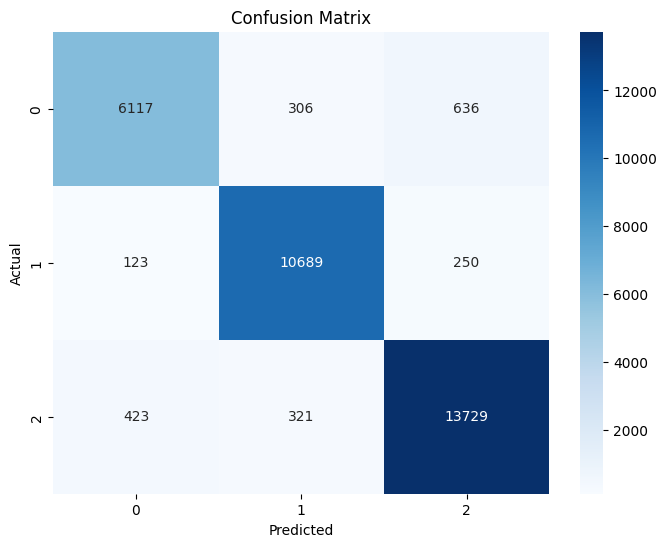

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predictions on test data
predictions = SVCmodel.predict(X_test)
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.92      0.87      0.89      7059
         0.0       0.94      0.97      0.96     11062
         1.0       0.94      0.95      0.94     14473

    accuracy                           0.94     32594
   macro avg       0.93      0.93      0.93     32594
weighted avg       0.94      0.94      0.94     32594



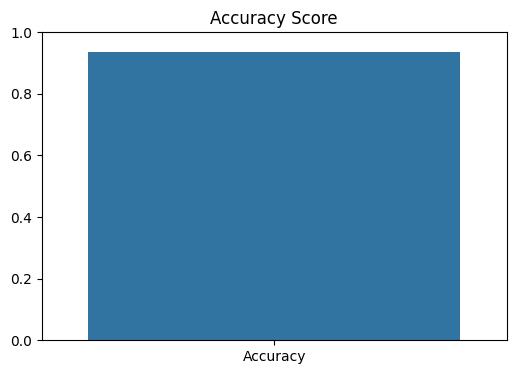

In [13]:
# Accuracy Score
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Accuracy Score')
plt.ylim(0, 1)
plt.show()


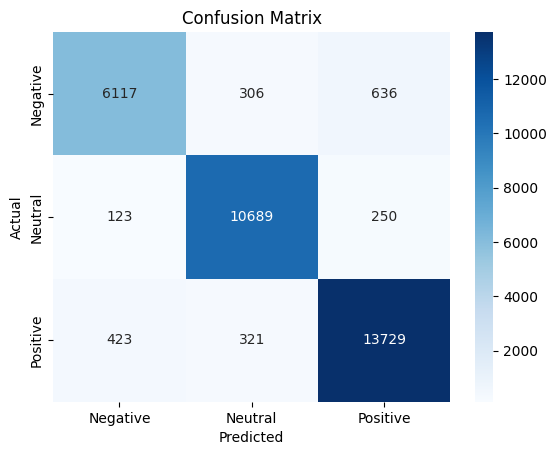

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred2)

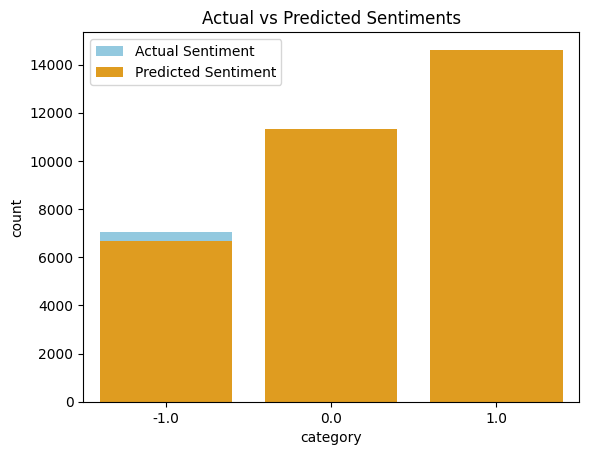

In [15]:
# Classification Report Visualization
classification_report(y_test, y_pred2)

# Bar Plots (for illustration purposes)
sns.countplot(x=y_test, color='skyblue', label='Actual Sentiment')
sns.countplot(x=y_pred2, color='orange', label='Predicted Sentiment')
plt.legend()
plt.title('Actual vs Predicted Sentiments')
plt.show()

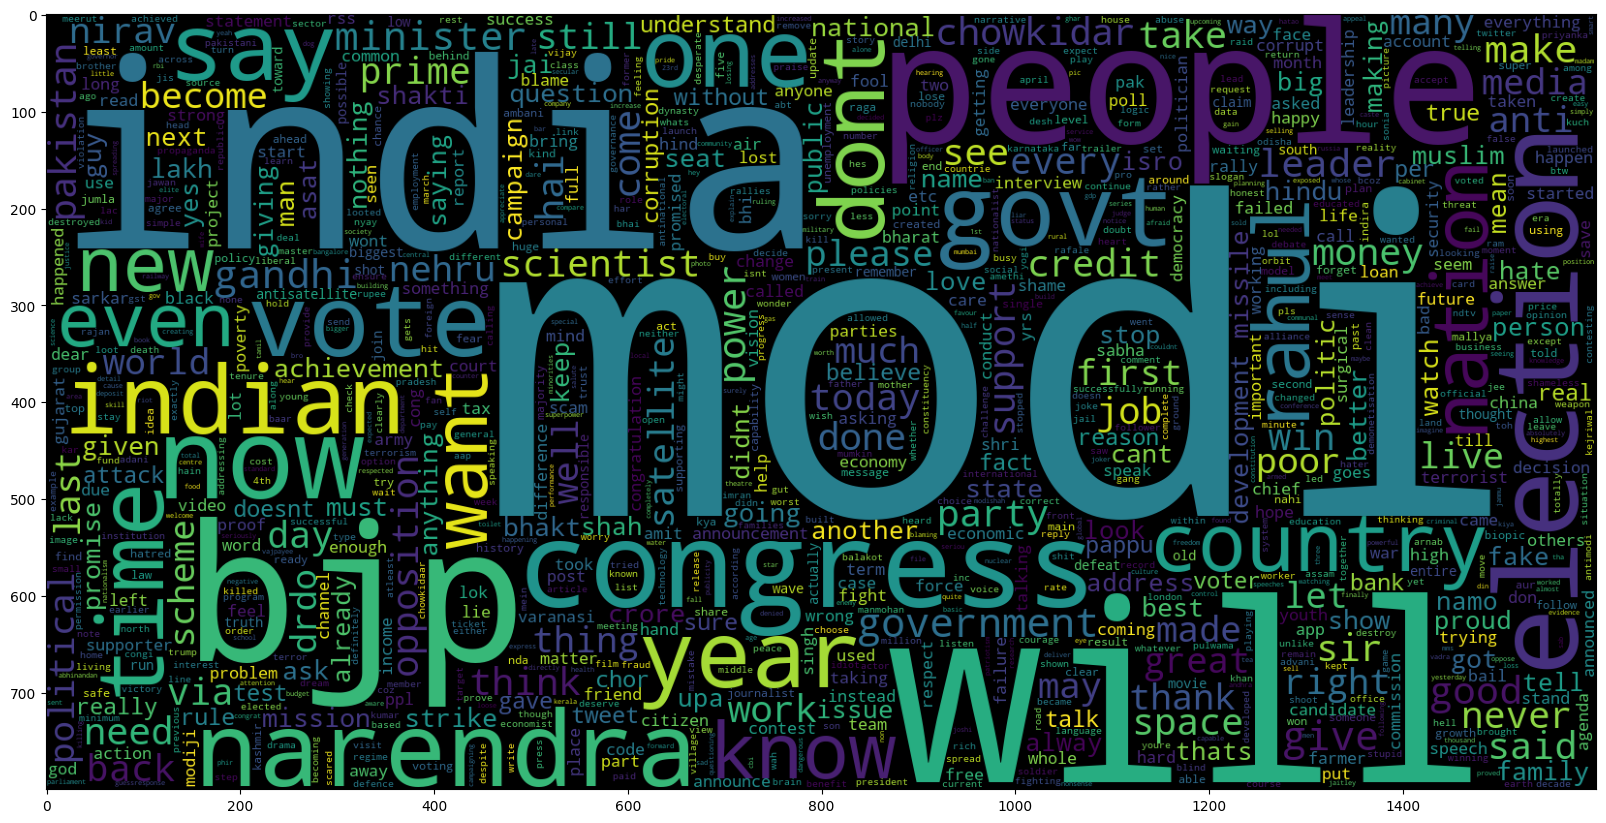

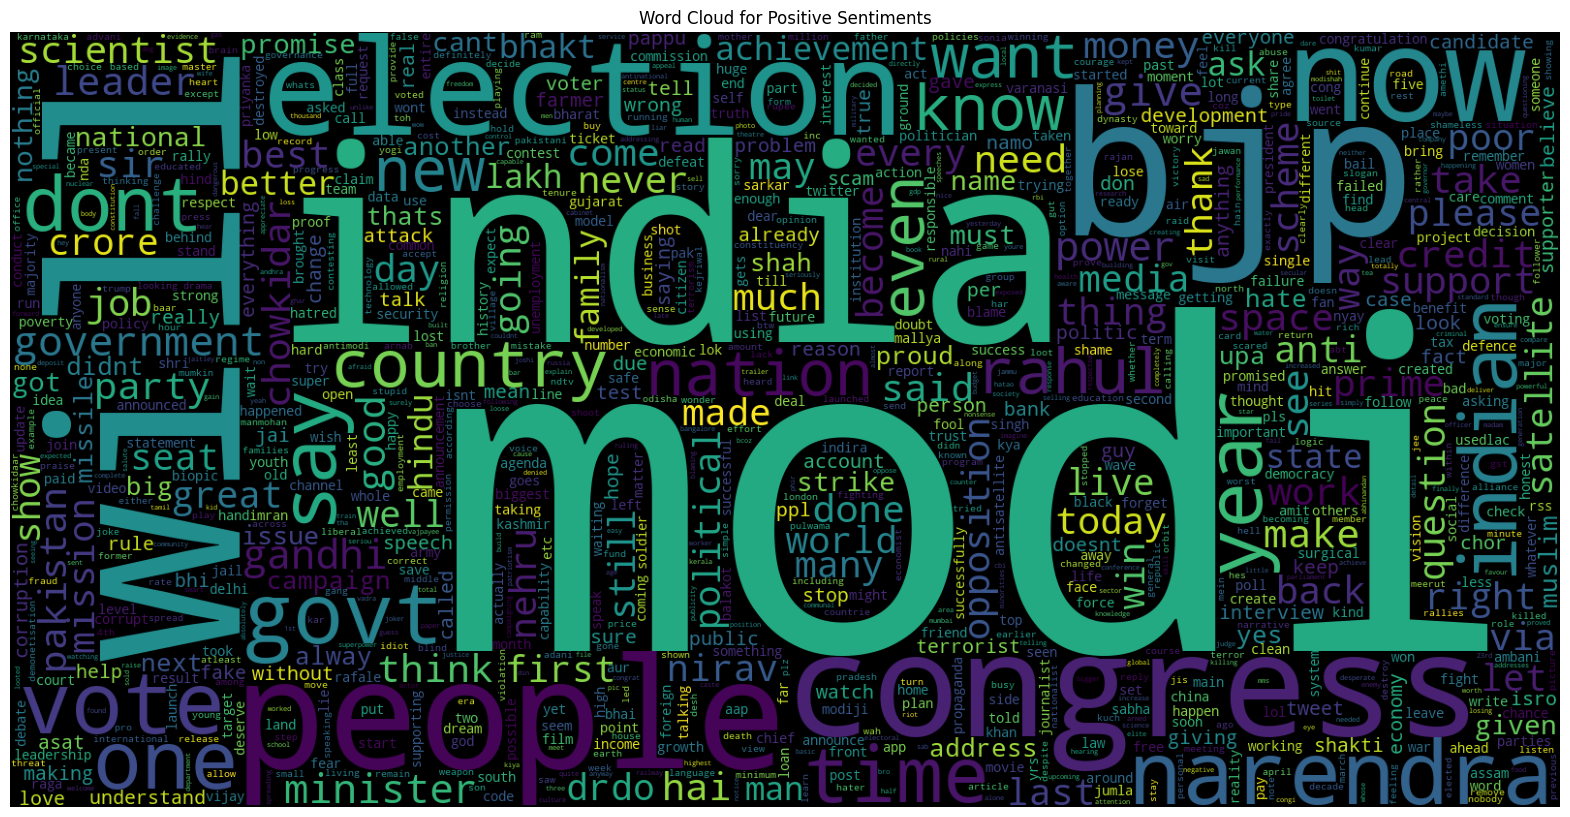

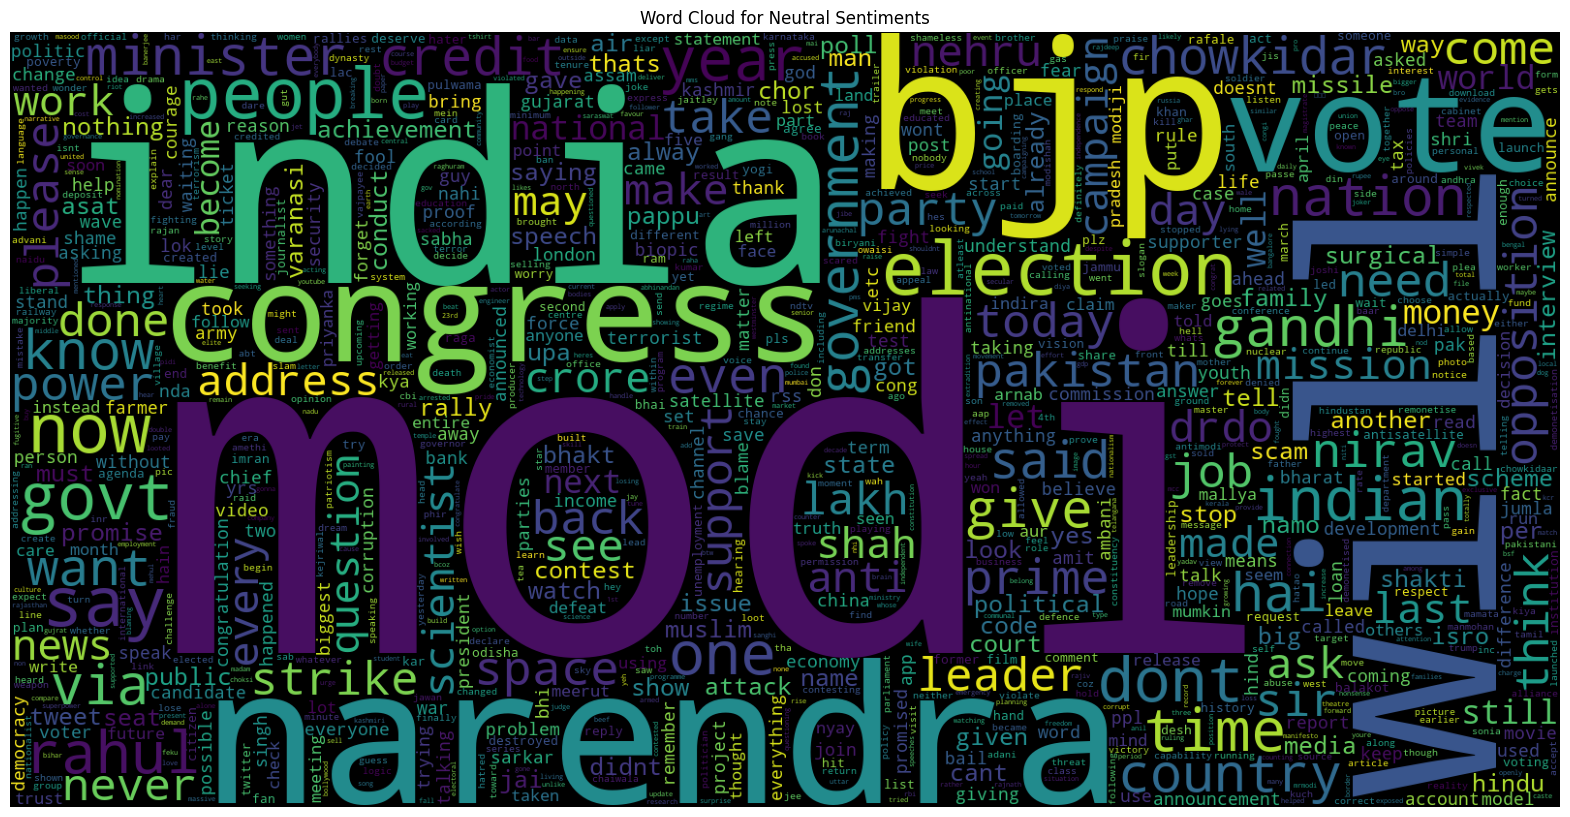

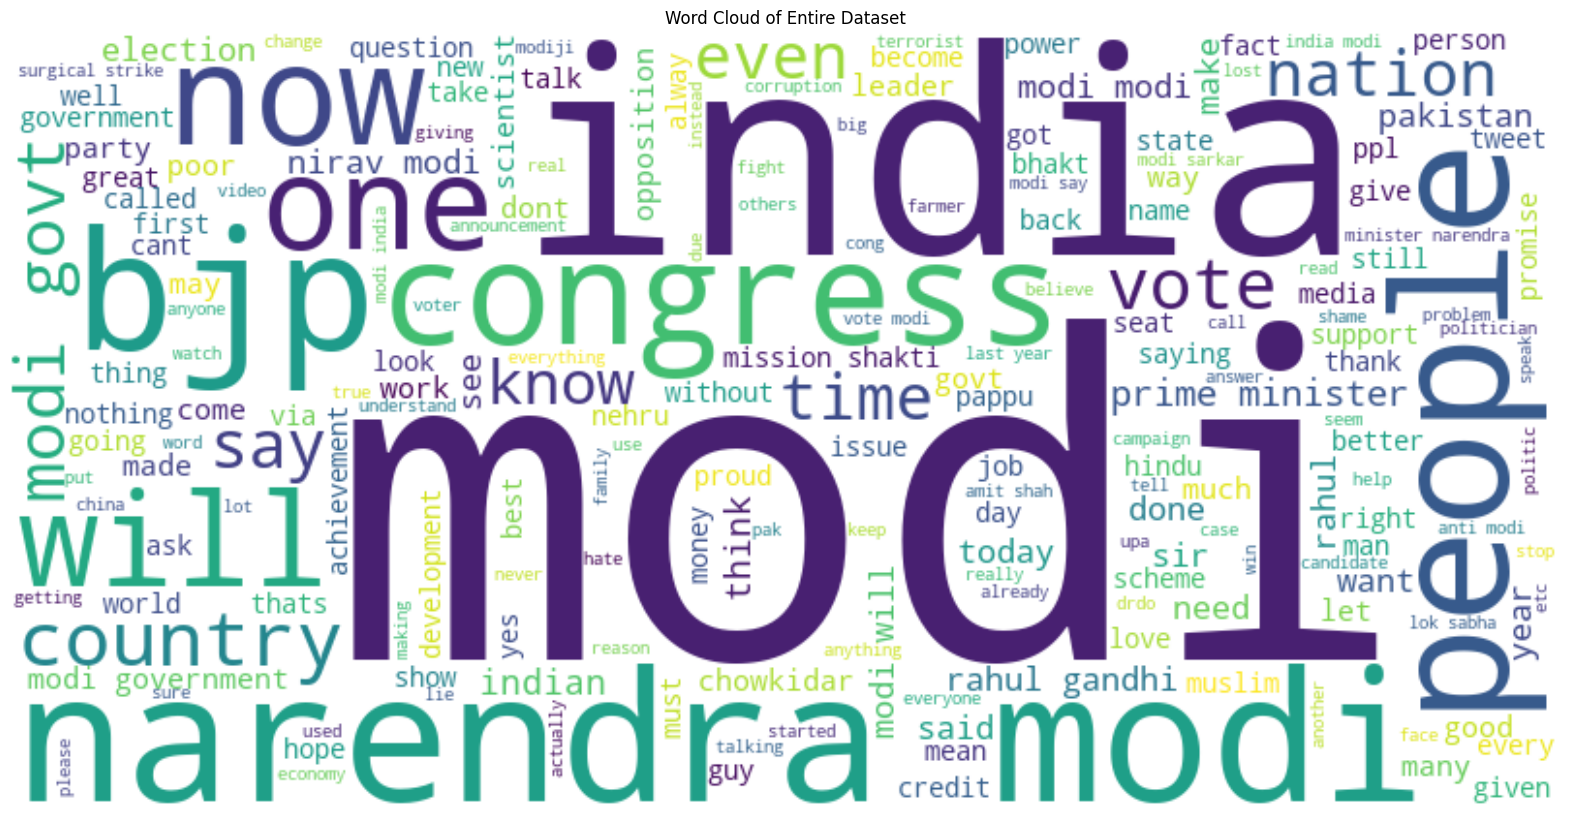

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

data_neg = data['tweet'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming data_pos contains the text data for positive sentiments
data_pos = data['tweet'][:]  # Adjust based on your data

plt.figure(figsize=(20, 20))

# Word Cloud for Positive Sentiments
wc_pos = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos))

# Plot Word Cloud for Positive Sentiments
plt.imshow(wc_pos)
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()
# Filter tweets associated with neutral sentiments
neutral_tweets = data[data['category'] == 0]['tweet'][:162969]

# Generate word cloud
plt.figure(figsize=(20, 20))
wc_neutral = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(neutral_tweets))
plt.imshow(wc_neutral)
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiments')
plt.show()
# Concatenate all tweets into a single string
all_tweets = ' '.join(data['tweet'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(all_tweets)

# Plot the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Entire Dataset')
plt.axis('off')
plt.show()